In [123]:
import pandas as pd

In [124]:
train_df = pd.read_csv('data.csv')
test_df = pd.read_csv('test.csv')

In [125]:
train_df.head(10)

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
0,0,17,34,42.876495,Yes,No,Yes,3,1,2011,3.16,12,4,94.876495,2,balcony,Moskovskij,2,28285348
1,1,17,12,25.487543,Yes,Yes,Yes,11,1,1908,4.68,2,2,58.154210,1,balcony,Nevskij,2,12923063
2,2,22,35,39.041948,No,No,Yes,9,1,1953,3.12,3,2,99.041948,2,balcony,Kirovskij,3,20463247
3,3,11,26,11.646696,No,Yes,Yes,5,0,2004,2.50,15,1,50.313363,2,loggia,Krasnoselskij,0,10517141
4,4,8,14,14.406673,No,No,Yes,18,1,1970,2.50,7,2,42.406673,1,balcony,Krasnoselskij,0,8455506
5,5,10,15,34.519627,Yes,Yes,Yes,6,0,2000,3.28,10,4,61.519627,1,loggia,Kirovskij,1,11828754
6,6,16,8,22.986172,Yes,Yes,Yes,5,2,1925,3.64,2,2,48.652839,1,balcony,Krasnoselskij,2,10139447
7,7,22,30,11.402726,No,Yes,Yes,13,2,2005,2.50,12,2,67.736059,2,loggia,Krasnoselskij,1,14247682
8,8,8,36,35.612828,No,Yes,Yes,8,1,1946,2.50,3,1,82.279494,2,balcony,Vyborgskij,3,15526024
9,9,15,13,18.894486,Yes,No,Yes,3,2,1995,4.77,11,10,47.894486,1,loggia,Moskovskij,1,14248159


In [126]:
train_df.isnull().sum()

index                   0
kitchen_area            0
bath_area               0
other_area              0
gas                     0
hot_water               0
central_heating         0
extra_area              0
extra_area_count        0
year                    0
ceil_height             0
floor_max               0
floor                   0
total_area              0
bath_count              0
extra_area_type_name    0
district_name           0
rooms_count             0
price                   0
dtype: int64

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

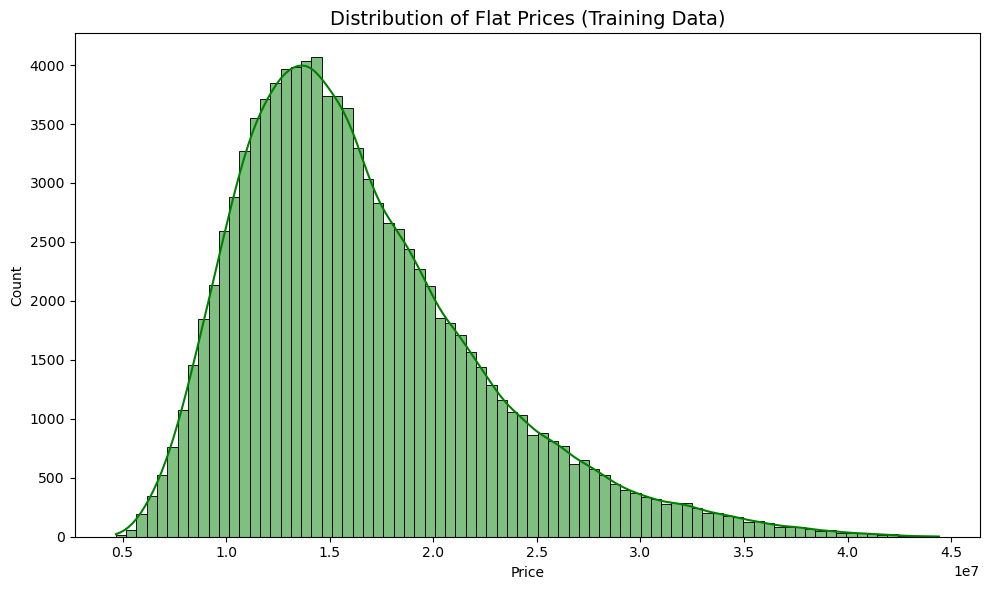

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['price'], bins=80, kde=True, color='green')
plt.title('Distribution of Flat Prices (Training Data)', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

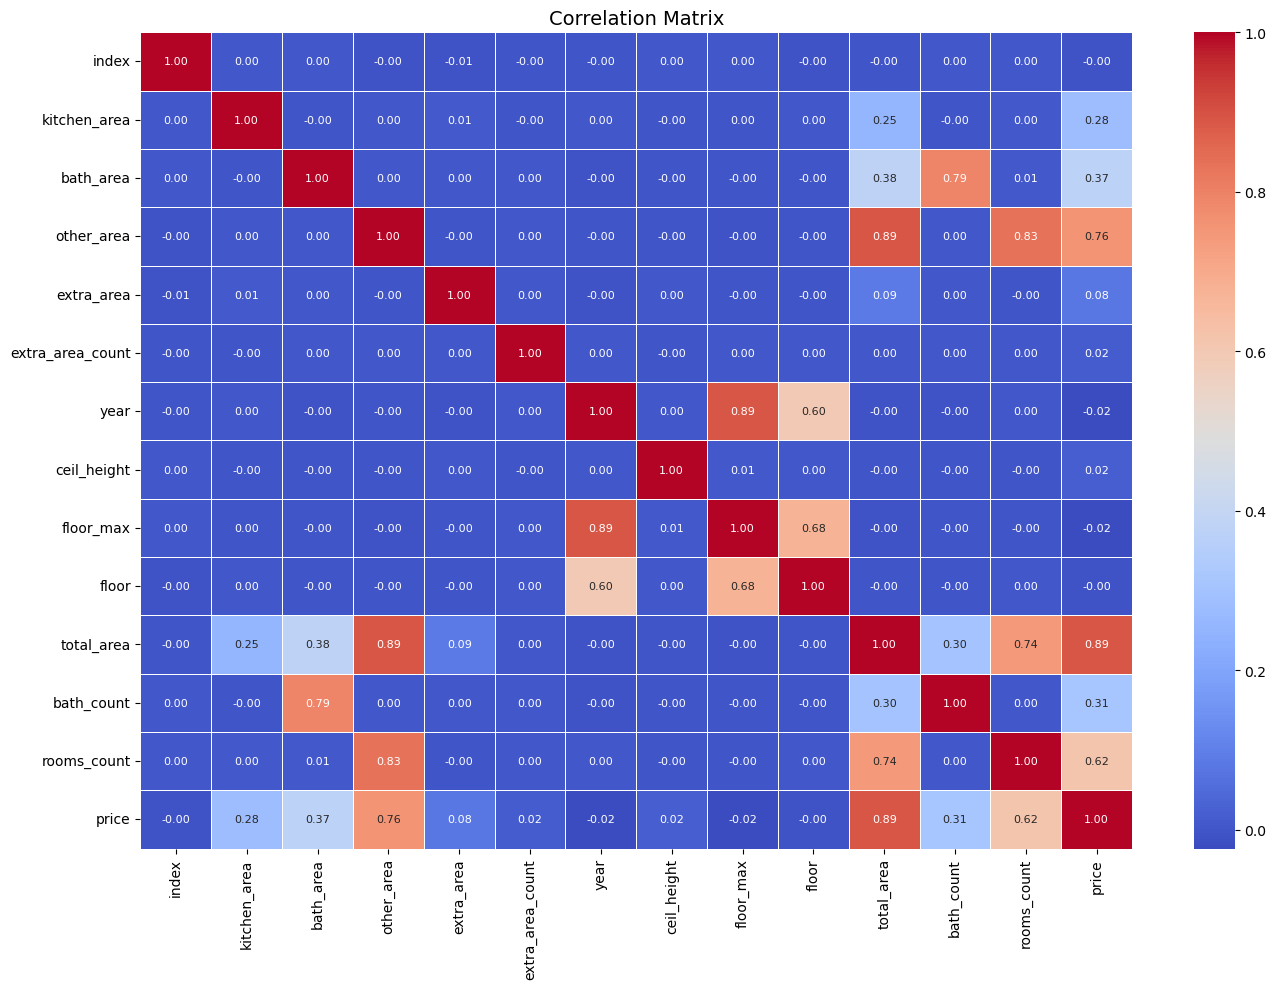

In [129]:
import numpy as np
numeric_cols = train_df.select_dtypes(include=np.number).columns
corr = train_df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, annot_kws={'size':8})
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

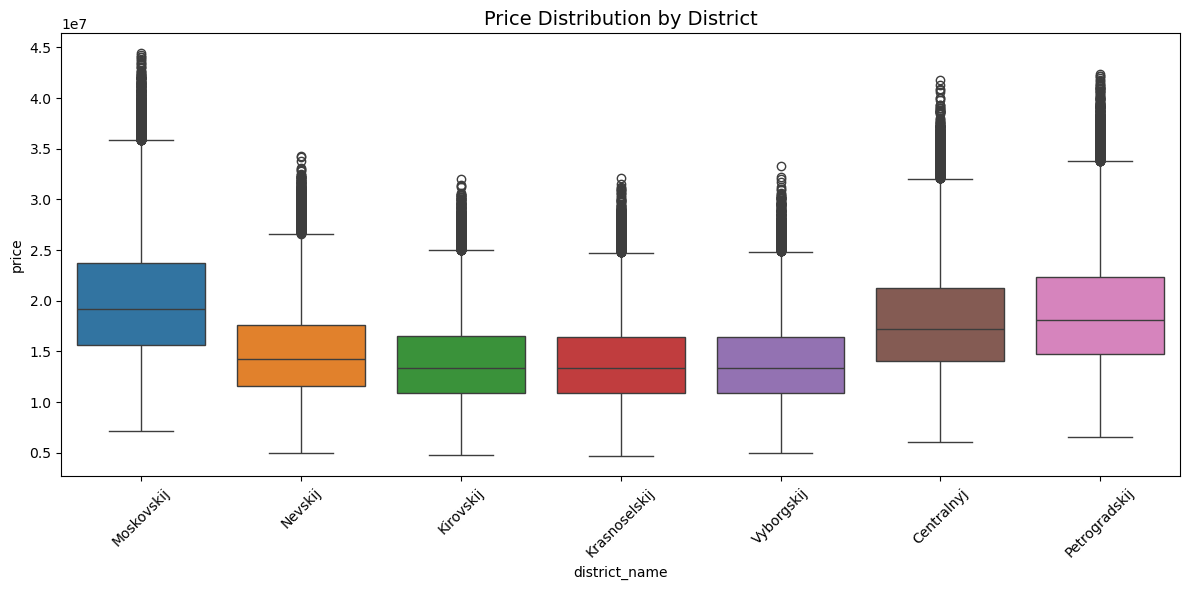

In [130]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='district_name', y='price',
            hue='district_name', legend=False)
plt.xticks(rotation=45)
plt.title('Price Distribution by District', fontsize=14)
plt.tight_layout()
plt.show()

In [131]:
cat_features = ['gas', 'hot_water', 'central_heating', 'extra_area_type_name', 'district_name']

In [132]:
x = train_df.drop(columns=['index', 'price'])
y = np.log1p(train_df['price'])
x_test = test_df.drop(columns=['index'])

In [133]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x, y, test_size=0.2, random_state=76
)

from catboost import CatBoostRegressor, Pool

train_pool = Pool(x_train, y_train, cat_features=cat_features)
valid_pool = Pool(x_valid, y_valid, cat_features=cat_features)

In [157]:
model = CatBoostRegressor(
    iterations=20000,
    learning_rate=0.025,        
    depth=4,
    l2_leaf_reg=7,
    subsample=0.8,
    colsample_bylevel=0.8,
    random_seed=76,
    verbose=500,
    early_stopping_rounds=300,
    eval_metric='RMSE',
    loss_function='RMSE',
    use_best_model=True
)

In [158]:
model.fit(train_pool,eval_set=valid_pool)

0:	learn: 0.3434281	test: 0.3436232	best: 0.3436232 (0)	total: 27.8ms	remaining: 9m 15s
500:	learn: 0.0172805	test: 0.0147326	best: 0.0147326 (500)	total: 23.6s	remaining: 15m 20s
1000:	learn: 0.0138338	test: 0.0121227	best: 0.0121227 (1000)	total: 48.2s	remaining: 15m 14s
1500:	learn: 0.0131066	test: 0.0117462	best: 0.0117462 (1500)	total: 1m 13s	remaining: 15m 5s
2000:	learn: 0.0126741	test: 0.0115751	best: 0.0115751 (2000)	total: 1m 38s	remaining: 14m 42s
2500:	learn: 0.0123933	test: 0.0114606	best: 0.0114606 (2500)	total: 2m 4s	remaining: 14m 28s
3000:	learn: 0.0121893	test: 0.0113655	best: 0.0113655 (3000)	total: 2m 29s	remaining: 14m 6s
3500:	learn: 0.0119776	test: 0.0112844	best: 0.0112844 (3500)	total: 2m 55s	remaining: 13m 46s
4000:	learn: 0.0117925	test: 0.0112192	best: 0.0112192 (4000)	total: 3m 20s	remaining: 13m 20s
4500:	learn: 0.0116258	test: 0.0111679	best: 0.0111679 (4500)	total: 3m 45s	remaining: 12m 57s
5000:	learn: 0.0115080	test: 0.0111203	best: 0.0111203 (5000)	to

In [159]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_log = model.predict(x_valid)
y_valid_true = np.expm1(y_valid)
y_pred_price = np.expm1(y_pred_log)

mse  = mean_squared_error(y_valid_true, y_pred_price)
rmse = np.sqrt(mse)
r2   = r2_score(y_valid_true, y_pred_price)

print(f"MSE : {mse:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²  : {r2:.4f}")

MSE : 23,284,228,610
RMSE: 152,592
R²  : 0.9993


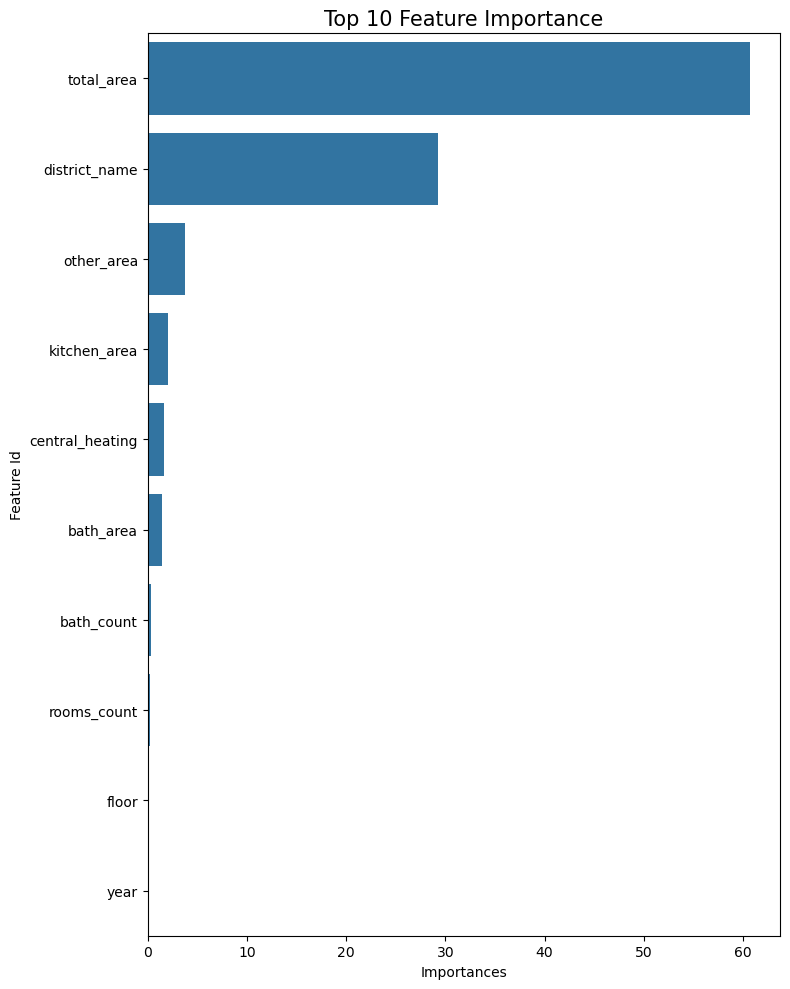

In [160]:
feature_importance = model.get_feature_importance(prettified=True)

plt.figure(figsize=(8, 10))
sns.barplot(data=feature_importance.head(10), x='Importances', y='Feature Id')
plt.title('Top 10 Feature Importance', fontsize=15)
plt.tight_layout()
plt.show()

In [161]:
predictions = np.expm1(model.predict(x_test))

In [162]:
submission = pd.DataFrame({
    'index': test_df['index'],
    'price': predictions
})

submission.to_csv('submission.csv', index=False)

In [163]:
import pickle

model_path = 'flat_price_model.pkl'

with open(model_path, 'wb') as f:
    pickle.dump(model, f)